# Tracking the Covid-19 Spread in the Houston Area

This notebook will track the spread of the Covid-19 spread in the general Houston area

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import DataFrame

In [3]:
# Change this to the directory of the Excel Workbook if forking
work = "~/OneDrive/Python/Pandas/Houston Corona/houstonNumbers.xlsx"

In [4]:
# Set the workbook as data
data = pd.read_excel(work)

In [5]:
# Sort the XLSX by date.
sort_by_date = data.sort_values(['Date'])

## Tables

The first table we show is one showing the number of new infections by date. This will be updated either every day or every other day. Data will be one day behind.

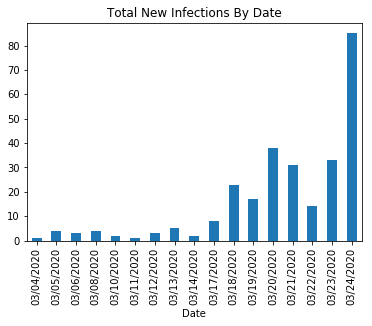

In [10]:
data['Date'] = data['Date'].dt.strftime('%m/%d/%Y') # Convert date to better format
date_count = data['Date'].groupby(data.Date).agg('count') # Each row is a new infection, count them per date
date_count.plot(kind='bar',
                title='Total New Infections By Date') 

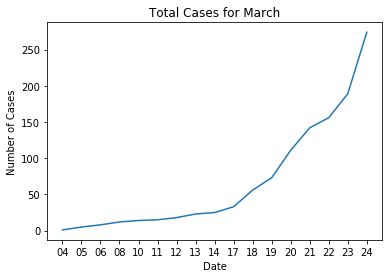

In [7]:
totalcases = 0          # Initialize variable for totalcases
totalcases_array = []   # Initialize array to store totals day by day
date_array = []         # Initialize array to store the dates

# The for loop adds each days count total to 'totalcases', then appends
# the integer to our array (O(n))
for cases in date_count:
    totalcases += cases
    totalcases_array.append(totalcases)

# The for loops adds the dates to the array. It will not add to the 
# array if it already exists. This is to prevent unnecessary duplicates
# (O(n))
for dates in data['Date'].dt.strftime('%d'):
    if dates in date_array:
        pass
    else:
        date_array.append(dates)

plt.plot(date_array, totalcases_array) # Create the plot, (x,y)
plt.title("Total Cases for March")    # Set title to total cases
plt.xlabel("Date")    # Set X Label      
plt.ylabel("Number of Cases") # Set Y Label
plt.show() # Show the plot

# TODO: Fix the date format so they don't overlap

In [8]:
#TODO: Compare growths by city/county
#TODO: Set NaN to unknown for origin count

In [8]:
"""Set the variables that will be used to hold the county
of each type of infection source"""
community_spread=data[data.Origin == 'Community Spread']
travel = data[data.Origin == 'Travel']
exposed = data[data.Origin == 'Exposed']
unknown = data[data.Origin == np.nan]

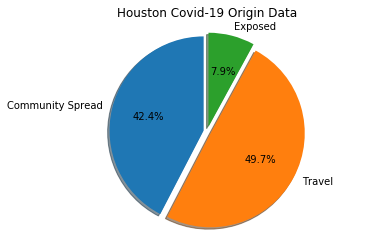

In [9]:
origin_count = [] # Initialize array
community_total = community_spread.Date.count()
travel_total = travel.Date.count()
exposed_total = exposed.Date.count()
labels = ['Community Spread', 'Travel', 'Exposed'] # Set the pie chart labels

#Add the total counts to the origin_count array
origin_count.append(community_total)
origin_count.append(travel_total)
origin_count.append(exposed_total)
explode=(0.04,0.04,0.05) # Set the gap between each pie section

#Initialize the figure
fig1, ax1 = plt.subplots()
ax1.pie(origin_count, 
        explode = explode,
        labels=labels, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=90)
ax1.axis('equal')

# Show plot
plt.title('Houston Covid-19 Origin Data')
plt.show()